<a href="https://colab.research.google.com/github/KulinerIn/Machine-Learning/blob/main/ML_Model_KulinerIn%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Unzip Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
zip_file = '/content/gdrive/My Drive/KulinerIn_Dataset.zip'
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall()

zip_ref.close()

# **Dataset Directory**

In [4]:
folder_dir = 'KulinerIn_Dataset'
print("Contents of base directory:")
print(os.listdir(folder_dir))

print("\nContents of train directory:")
print(os.listdir(f'{folder_dir}/Train'))

print("\nContents of test directory:")
print(os.listdir(f'{folder_dir}/Test'))

Contents of base directory:
['Test', 'Train']

Contents of train directory:
['Pukis', 'Nastar', 'Martabak_asin', 'kue_putri_salju', 'Martabak_Manis', 'Serabi', 'Lapis_legit', 'Onde-Onde', 'Kue_lapis_sagu', 'Klepon']

Contents of test directory:
['Pukis', 'Nastar', 'Martabak_asin', 'kue_putri_salju', 'Martabak_Manis', 'Serabi', 'Lapis_legit', 'Onde-Onde', 'Kue_lapis_sagu', 'Klepon']


In [5]:
train_dir = os.path.join(folder_dir, 'Train')
test_dir = os.path.join(folder_dir, 'Test')

#Directory of food training images
train_klepon_dir = os.path.join(train_dir, 'Klepon')
train_lapis_sagu_dir = os.path.join(train_dir, 'Kue_lapis_sagu')
train_putri_salju_dir = os.path.join(train_dir, 'kue_putri_salju')
train_lapis_legit_dir = os.path.join(train_dir, 'Lapis_legit')
train_martabak_asin_dir = os.path.join(train_dir, 'Martabak_asin')
train_martabak_manis_dir = os.path.join(train_dir, 'Martabak_Manis')
train_nastar_dir = os.path.join(train_dir, 'Nastar')
train_onde_onde_dir = os.path.join(train_dir, 'Onde-Onde')
train_pukis_dir = os.path.join(train_dir, 'Pukis')
train_serabi_dir = os.path.join(train_dir, 'Serabi')

In [6]:
#Directory of food testing images
test_klepon_dir = os.path.join(test_dir, 'Klepon')
test_lapis_sagu_dir = os.path.join(test_dir, 'Kue_lapis_sagu')
test_putri_salju_dir = os.path.join(test_dir, 'kue_putri_salju')
test_lapis_legit_dir = os.path.join(test_dir, 'Lapis_legit')
test_martabak_asin_dir = os.path.join(test_dir, 'Martabak_asin')
test_martabak_manis_dir = os.path.join(test_dir, 'Martabak_Manis')
test_nastar_dir = os.path.join(test_dir, 'Nastar')
test_onde_onde_dir = os.path.join(test_dir, 'Onde-Onde')
test_pukis_dir = os.path.join(test_dir, 'Pukis')
test_serabi_dir = os.path.join(test_dir, 'Serabi')

In [7]:
train_klepon_filenames = os.listdir(train_klepon_dir)
train_lapis_sagu_filenames = os.listdir(train_lapis_sagu_dir)
train_putri_salju_filenames = os.listdir(train_putri_salju_dir)
train_lapis_legit_filenames = os.listdir(train_lapis_legit_dir)
train_martabak_asin_filenames = os.listdir(train_martabak_asin_dir)
train_martabak_manis_filenames = os.listdir(train_martabak_manis_dir)
train_nastar_filenames = os.listdir(train_nastar_dir)
train_onde_onde_filenames = os.listdir(train_onde_onde_dir)
train_pukis_filenames = os.listdir(train_pukis_dir)
train_serabi_filenames = os.listdir(train_serabi_dir)

In [8]:
test_klepon_filenames = os.listdir(test_klepon_dir)
test_lapis_sagu_filenames = os.listdir(test_lapis_sagu_dir)
test_putri_salju_filenames = os.listdir(test_putri_salju_dir)
test_lapis_legit_filenames = os.listdir(test_lapis_legit_dir)
test_martabak_asin_filenames = os.listdir(test_martabak_asin_dir)
test_martabak_manis_filenames = os.listdir(test_martabak_manis_dir)
test_nastar_filenames = os.listdir(test_nastar_dir)
test_onde_onde_filenames = os.listdir(test_onde_onde_dir)
test_pukis_filenames = os.listdir(test_pukis_dir)
test_serabi_filenames = os.listdir(test_serabi_dir)

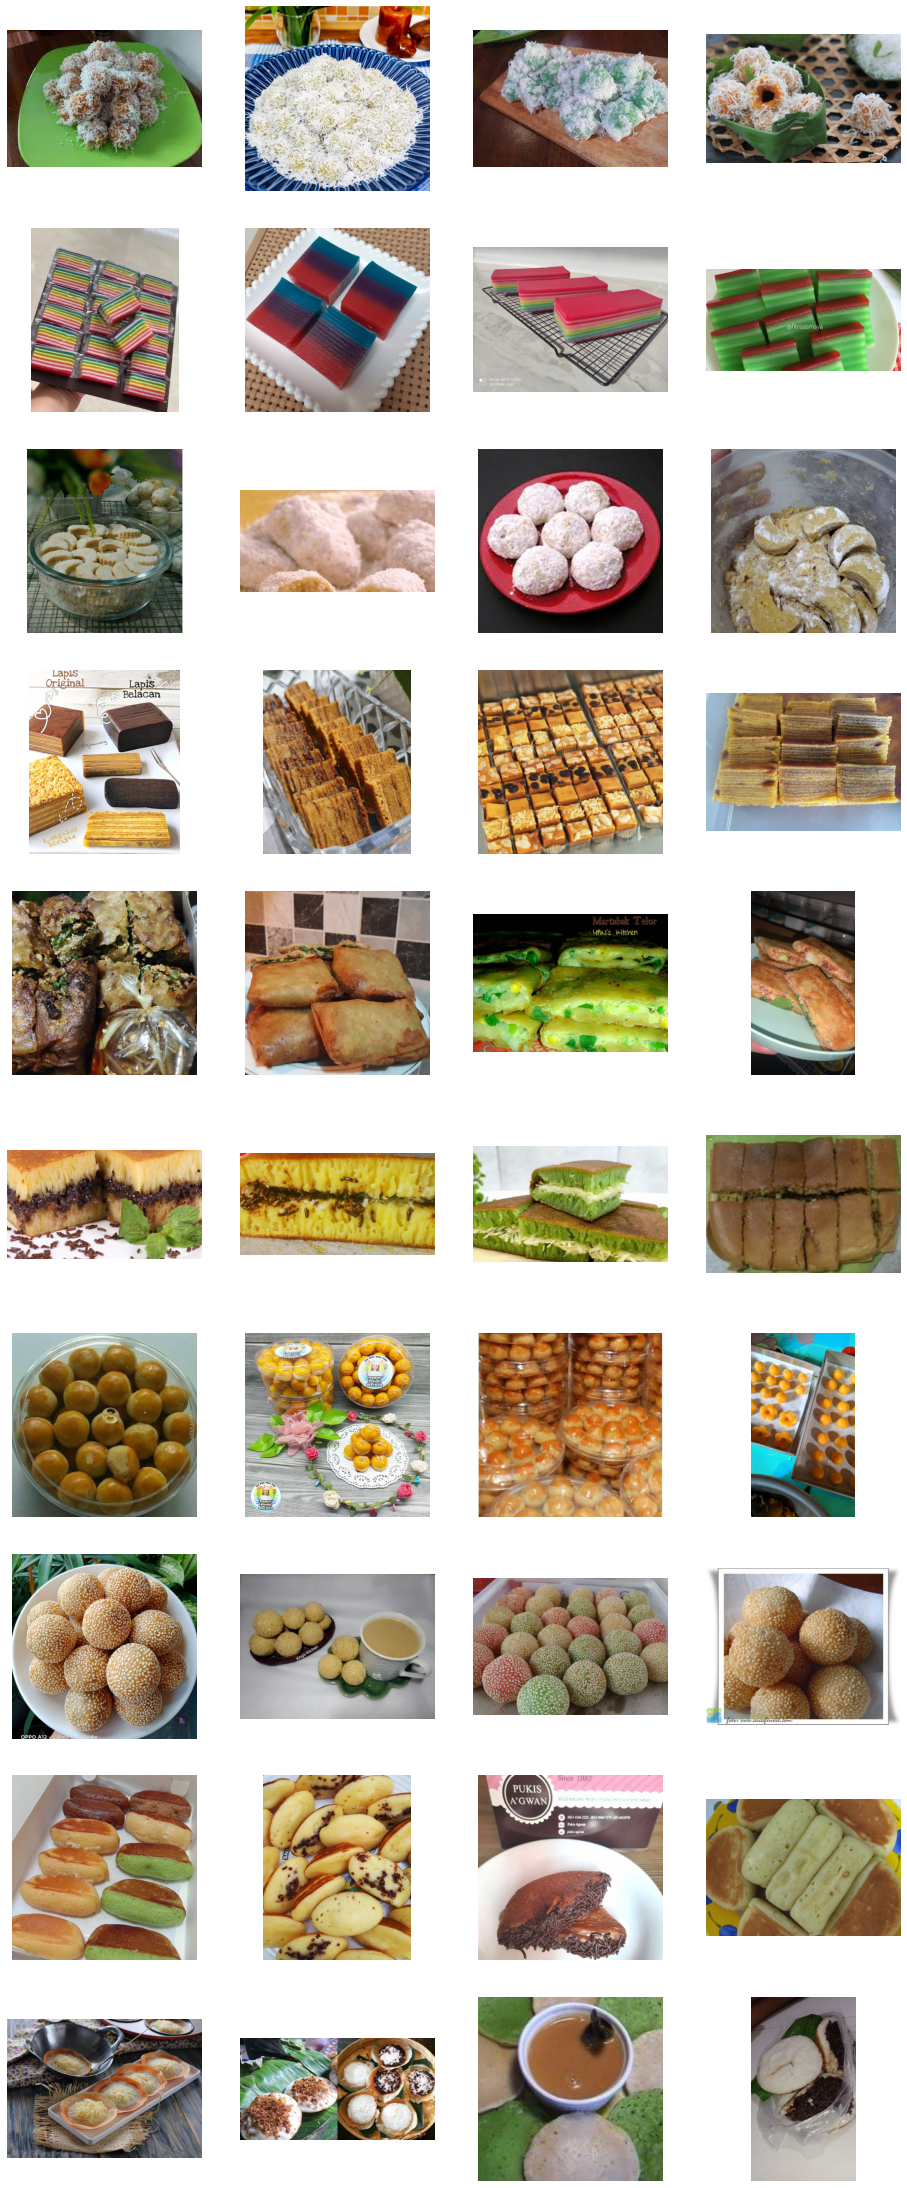

In [9]:
%matplotlib inline

nrows = 10
ncols = 4

pic_index = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_klepon = [os.path.join(train_klepon_dir, filename)
                   for filename in train_klepon_filenames[pic_index-4:pic_index]
                  ]
next_lapis_sagu = [os.path.join(train_lapis_sagu_dir, filename)
                   for filename in train_lapis_sagu_filenames[pic_index-4:pic_index]
                  ]
next_putri_salju = [os.path.join(train_putri_salju_dir, filename)
                   for filename in train_putri_salju_filenames[pic_index-4:pic_index]
                  ]
next_lapis_legit = [os.path.join(train_lapis_legit_dir, filename)
                   for filename in train_lapis_legit_filenames[pic_index-4:pic_index]
                  ]
next_martabak_asin = [os.path.join(train_martabak_asin_dir, filename)
                   for filename in train_martabak_asin_filenames[pic_index-4:pic_index]
                  ]
next_martabak_manis = [os.path.join(train_martabak_manis_dir, filename)
                   for filename in train_martabak_manis_filenames[pic_index-4:pic_index]
                  ]
next_nastar = [os.path.join(train_nastar_dir, filename)
                   for filename in train_nastar_filenames[pic_index-4:pic_index]
                  ]
next_onde_onde = [os.path.join(train_onde_onde_dir, filename)
                   for filename in train_onde_onde_filenames[pic_index-4:pic_index]
                  ]
next_pukis = [os.path.join(train_pukis_dir, filename)
                   for filename in train_pukis_filenames[pic_index-4:pic_index]
                  ]
next_serabi = [os.path.join(train_serabi_dir, filename)
                   for filename in train_serabi_filenames[pic_index-4:pic_index]
                  ]
for i, img_path in enumerate(next_klepon + next_lapis_sagu + next_putri_salju + 
                             next_lapis_legit + next_martabak_asin + next_martabak_manis +
                             next_nastar + next_onde_onde + next_pukis + next_serabi ):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# **Transfer Learning**

In [21]:
# Download InceptionV3
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-06-08 03:39:42--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   223MB/s    in 0.4s    

2022-06-08 03:39:43 (223 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [22]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
tfr_learning_model = InceptionV3(input_shape = (224, 224, 3), 
                                include_top = False, 
                                weights = 'imagenet')

# Load the pre-trained weights you downloaded.
tfr_learning_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in tfr_learning_model.layers:
  layer.trainable = False

tfr_learning_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                      

In [23]:
# Choose `mixed_7` as the last layer of your base model
last_layer = tfr_learning_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


# **Image Augmentation**

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(224, 224),
                  class_mode='categorical',
                  batch_size= 20)

test_datagen = ImageDataGenerator(rescale=1./255)
                                    
test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size=(224, 224),
                 class_mode='categorical',
                 batch_size= 20)

Found 2865 images belonging to 10 classes.
Found 398 images belonging to 10 classes.


# **Train Model**

In [25]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
x = layers.Dense  (10, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(tfr_learning_model.input, x) 

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [15]:
# Print the model summary. See your dense network connected at the end.
#model.summary()

#def create_model():
#    model = tf.keras.models.Sequential([
#        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224,3)),
#        tf.keras.layers.MaxPool2D(2,2),
#        tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
#        tf.keras.layers.MaxPool2D(2,2),
#        tf.keras.layers.Flatten(),
#        tf.keras.layers.Dense(512, activation='relu'),
#        tf.keras.layers.Dropout(0.2),
#        tf.keras.layers.Dense(10, activation='softmax')
#    ])


In [27]:
learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = learning_rate),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
#return model

#model = create_model()
#model.summary()

In [28]:
history = model.fit (train_generator,
                     steps_per_epoch= 2865/20,
                     epochs= 20,
                     validation_data= test_generator,
                     validation_steps = 398/20,
                     verbose = 2)

Epoch 1/20
143/143 - 109s - loss: 0.7977 - accuracy: 0.7347 - val_loss: 0.4345 - val_accuracy: 0.8693 - 109s/epoch - 759ms/step
Epoch 2/20
143/143 - 94s - loss: 0.3543 - accuracy: 0.8771 - val_loss: 0.2884 - val_accuracy: 0.9121 - 94s/epoch - 659ms/step
Epoch 3/20
143/143 - 93s - loss: 0.2979 - accuracy: 0.9051 - val_loss: 0.2942 - val_accuracy: 0.9095 - 93s/epoch - 647ms/step
Epoch 4/20
143/143 - 93s - loss: 0.2469 - accuracy: 0.9159 - val_loss: 0.2585 - val_accuracy: 0.9246 - 93s/epoch - 649ms/step
Epoch 5/20
143/143 - 94s - loss: 0.2117 - accuracy: 0.9316 - val_loss: 0.2432 - val_accuracy: 0.9271 - 94s/epoch - 655ms/step
Epoch 6/20
143/143 - 93s - loss: 0.1784 - accuracy: 0.9368 - val_loss: 0.2125 - val_accuracy: 0.9296 - 93s/epoch - 647ms/step
Epoch 7/20
143/143 - 94s - loss: 0.1704 - accuracy: 0.9421 - val_loss: 0.2109 - val_accuracy: 0.9221 - 94s/epoch - 656ms/step
Epoch 8/20
143/143 - 96s - loss: 0.1493 - accuracy: 0.9501 - val_loss: 0.2768 - val_accuracy: 0.9322 - 96s/epoch - 6

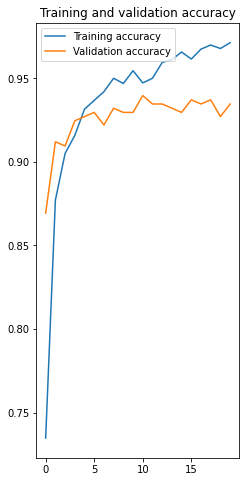

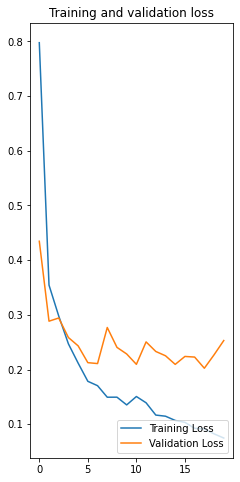

In [29]:
def plot_loss_acc(history):
  
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, acc, label='Training accuracy')
  plt.plot(epochs, val_acc, label='Validation accuracy')
  plt.legend(loc='upper left')
  plt.title('Training and validation accuracy')

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 2)
  plt.plot(epochs, loss, label='Training Loss')
  plt.plot(epochs, val_loss, label='Validation Loss')
  plt.legend(loc='lower right')
  plt.title('Training and validation loss')
 
  plt.show()
# Plot training results
plot_loss_acc(history)

In [31]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path= fn
  img=image.load_img(path, target_size=(224, 224))
  
  x=image.img_to_array(img)
  x = x/255.0
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=20)
  print(fn)
  print(classes[0])

Saving WhatsApp Image 2022-05-31 at 15.29.42 (1).jpeg to WhatsApp Image 2022-05-31 at 15.29.42 (1).jpeg
WhatsApp Image 2022-05-31 at 15.29.42 (1).jpeg
[2.3522359e-14 1.3733758e-12 6.3887862e-10 1.7588610e-08 4.6603086e-11
 1.1157910e-08 3.4269608e-12 1.0000000e+00 5.4140067e-08 8.2488721e-12]


In [32]:
import pathlib

export_dir = '/tmp/saved_model/'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('/tmp/ml_model.tflite')
tflite_model_file.write_bytes(tflite_model)

files.download(tflite_model_file)

INFO:tensorflow:Assets written to: /tmp/saved_model/assets


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>